In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


#==================================#
#      Konstanta FISIKA            #
#==================================#
# 1/2 CD Rho V^2 + mg = m*a --> (Cd Rho V^2)/2m + g = a

def calculate_constant(mass,gravity , C_Drag, Area, rho):
    
    A = np.array([0, 0, -gravity])
    B_temp = -(C_Drag * rho * Area) / (2 * mass)
    B = np.array([B_temp,B_temp,B_temp])
    return A,B

#==================================#
#           Data dari FIBA         #
#==================================#
#Sementara pake bola size 6
MASS = 0.550
CIRCUMFERENCE = 0.730
RADIUS = CIRCUMFERENCE/(2*np.pi)
AREA = np.pi*RADIUS*RADIUS
RHO = 1.204
GRAVITY = 9.80
DRAG = 0.54
COR_HOOP = 0.6
COR_RING = 0.65

#KONSTANTA SIMULASI
ConstA, ConstB = calculate_constant(MASS,GRAVITY,DRAG,AREA,RHO)
print(f"A = {ConstA}\nB = {ConstB}")


#==================================#
#          Koordinat Lapangan   
#==================================#

#Backpost
BackPostX = 6.8
BackPostY = [-900,900]
BackPostZ = [2.43-0.150,2.43-0.150+1.050]

#RingPlate
RingPlateX = [6.8,(6.8-0.151)]
RingPlateY = [-0.075,0.075]
RingPlateZ = [2.43]

#Ring
RingCenter = [6.8, 0, 2.43] #X,Y,Z
RingDiameter = 0.450


#================================#
#           Cek Tabrakan         #
#================================#
def CheckCollision (X,Y,Z):
    CollisionEvent = 0
    #Backpost
    if np.isclose(X,BackPostX, atol= 0.01) and BackPostY[0]<=Y<=BackPostY[1] and BackPostZ[0]<=Z<=BackPostZ[1]:
        CollisionEvent = 1
    
    #Ringplate
    if RingPlateX[0]<=X<=RingPlateX[1] and RingPlateY[0]<=Y<=RingPlateY[1] and np.isclose(RingPlateZ,Z, atol=0.01):
        CollisionEvent = 2

    #Ring Hitbox
    if (X-RingCenter[0])**2 + (Y-RingCenter[1])**2 <= RingDiameter and np.isclose(RingCenter[2]):
        CollisionEvent = 3 
    return CollisionEvent

A = [ 0.   0.  -9.8]
B = [-0.02506475 -0.02506475 -0.02506475]


In [2]:

#==================================#
#         SHOOTER FAHMI            #
#==================================#
def ShooterFahmi (X,Y,Z,Elevation,Rotation): #Sudut sementara dalam degree dan X,Y,Z koordinat Robot. (Hanya Shooter)

    #Spesifikasi Shooter 
    CenterToShaftX = -0.175
    RollerDiameter = 0.240
    CenterToShaftZ = 0.050 
    ShooterLength = 0.350 
    Vmaks = 12

    #Konversi Sudut
    ShaftAngle = np.deg2rad(90-Elevation)
    Elevation = np.deg2rad(Elevation)
    Rotation = np.deg2rad(Rotation)


    #Perhitungan Posisi Bola saat ditembak
    InitialX = X - (CenterToShaftX + ((ShooterLength-RollerDiameter)/2 + RollerDiameter)*np.cos(ShaftAngle))*np.cos(Rotation)
    InitialY = Y + (CenterToShaftX + ((ShooterLength-RollerDiameter)/2 + RollerDiameter)*np.cos(ShaftAngle))*np.sin(Rotation)
    InitialZ = Z + CenterToShaftZ + ((ShooterLength-RollerDiameter)/2 + RollerDiameter)*np.sin(Elevation)
    return InitialX,InitialY,InitialZ,Vmaks

Elevation = 60
Rotation = 0
X = 0
Y = 0
Z = 0

Speed = np.array([0, 0, 0])
InitialState = np.array(ShooterFahmi(X,Y,Z,Elevation,Rotation))
InitialState = np.around(np.append(InitialState,Speed),decimals=3)

print(f"Robot initial State = {InitialState}")

Robot initial State = [-0.08   0.     0.305 12.     0.     0.     0.   ]


In [3]:
#===========================#
#       NickoPegas          #
#===========================#

def ShooterNicko (X,Y,Z,Elevation,Rotation):
   
   #Spesifikasi Shoter
   CenterToShaftX = -0.155
   CenterToShaftZ = 0.130
   
   
   ShooterLength = 0.650
   ShaftToShooterZ = 0.150
   #KonversiSudut
   ShaftAngle = np.deg2rad(Elevation)
   Rotation = np.deg2rad(Rotation)


   #Perhitungan
   InitialX = X + (CenterToShaftX-ShaftToShooterZ*np.sin(ShaftAngle)+ShooterLength*np.cos(ShaftAngle))*np.cos(Rotation)
   InitialY = Y + (CenterToShaftX-ShaftToShooterZ*np.sin(ShaftAngle)+ShooterLength*np.cos(ShaftAngle))*np.sin(Rotation)
   InitialZ = Z + CenterToShaftZ + ShaftToShooterZ*np.cos(ShaftAngle) + ShooterLength*np.sin(ShaftAngle)
   
   return InitialX,InitialY,InitialZ

Elevation = 30
Rotation = 90
X = 0
Y = 0
Z = 0

Speed = np.array([0, 0, 0])
InitialState = np.array(ShooterNicko(X,Y,Z,Elevation,Rotation))
InitialState = np.around(np.append(InitialState,Speed),decimals=3)


print(f"Robot initial State = {InitialState}")

Robot initial State = [0.    0.333 0.585 0.    0.    0.   ]


[6.68319956 0.         7.63940502]
2


<function matplotlib.pyplot.show(close=None, block=None)>

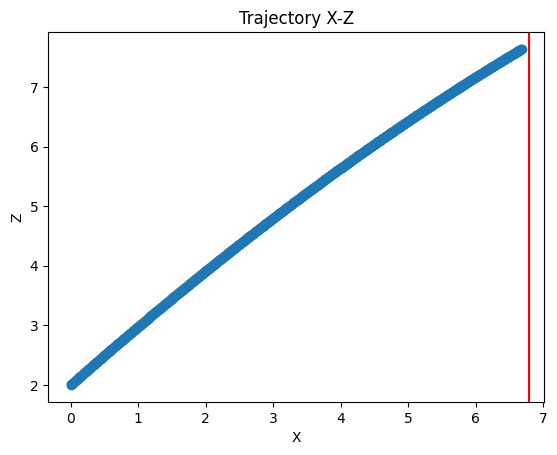

In [ ]:
#======================#
#       ODE SISTEM     #
#======================#
# sigma f = gravity + 1/2 Cd A V kuadrat
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
def ode_system(t, state):
    x, y, z, Vx, Vy, Vz = state
    dxdt = Vx
    dydt = Vy
    dzdt = Vz
    dVxdt = ConstA[0] + ConstB[0] * Vx**2
    dVydt = ConstA[1] + ConstB[1] * Vy**2
    dVzdt = ConstA[2] + ConstB[2] * Vz**2
    return [dxdt, dydt, dzdt, dVxdt, dVydt, dVzdt]


#==============================#
#       Collision Event        #
#==============================#
def Groundhit (t,y):
    return y[2] - 0
Groundhit.terminal = True
Groundhit.direction = -1 #Trigger when decreasing

BackPostX = 6.8
def BackPosthit (t,y):
    return y[0] - (6.8-RADIUS) #--> Backpost X posisition, ntah kenapa ga work kalau dimasukin variabel
BackPosthit.terminal = True
BackPosthit.direction = 1
    

#=========================#
#   Entry speed Vector    #
#=========================#
def DirectionVector (Velocity):
    
    return ...

def GetInitVel (Rotation,Elevation):
    VX = ...
    VY = ...
    VZ = ...
    return VX,VY,VZ
 

X0 = 0
Y0 = 0
Z0 = 2
VX0 = 15
VY0 = 0
VZ0 = 15
InitialState = [X0,Y0,Z0,VX0,VY0,VZ0]
timestart = 0
timestop = 20
solutiondensity = 40000

#Jumlah T_eval = TimeStop/SolutionDensity --> regardless berapa waktu sampai time stop
Trajectory = solve_ivp(ode_system, [timestart,timestop], InitialState, events=[Groundhit,BackPosthit],t_eval=np.linspace(timestart,timestop,solutiondensity), dense_output=True )



#==========================================#
#          Ambil Posisi Tabrakan           #
#==========================================#

LastState = np.array([Trajectory.y[0,-1],Trajectory.y[1,-1],Trajectory.y[2,-1]])
SpeedVector = np.array([Trajectory.y[3,-1],Trajectory.y[4,-1],Trajectory.y[5,-1]])
print(LastState)

#=====================#
#  Cek tipe Kolisi    #
#=====================#
# CollisionEvent = 0
# if Trajectory.t_events[0].size>0:
#     CollisionEvent = 1
# if Trajectory.t_events[1].size>0:
#     CollisionEvent = 2

MaxCollision = 1
for i in range(MaxCollision):
    if Trajectory.t_events[i].size>0:
        CollisionEvent = i+1

print(CollisionEvent)


#Kondisi terminasi simulasi
#Nilai Z TURUN dibawah 200

#========================#
#    Visualisasi Data    #
#========================#

#X-Z plane

plt.scatter(Trajectory.y[0],Trajectory.y[2],label = 'X-Z plane')
plt.title('Trajectory X-Z')
plt.xlabel('X')
plt.ylabel('Z')
plt.axvline(6.8,color = 'r')
# plt.axhline(0,0,Trajectory.y[0,-1],color = 'k')

plt.savefig('X-Z Plane')

plt.show


In [ ]:
#============================#
#    Percobaan Looping       #
#============================#

#InitArg
X0 = 0
Y0 = 0
Z0 = 2
VOutput = 12
Rotation = 0
Elevation = 45 #--> Dalam derajat



#Case shooter Fahmi
IsShooterFahmi=True
if IsShooterFahmi:
   InitialState = ShooterFahmi(X0,Y0,Z0,Elevation,Rotation)
   #Return [X,Y,Z, Max Speed]
   